# Off-axis angles for:
## Front : 3.17cm
## Rear: 2.68cm

The front blocker should be set at 3.17cm

In [175]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles
Ron_Doubles = [2.411, 2.3206, 2.0751, 1.814, 1.4732, 1.0556] # Front blocker size unknown

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

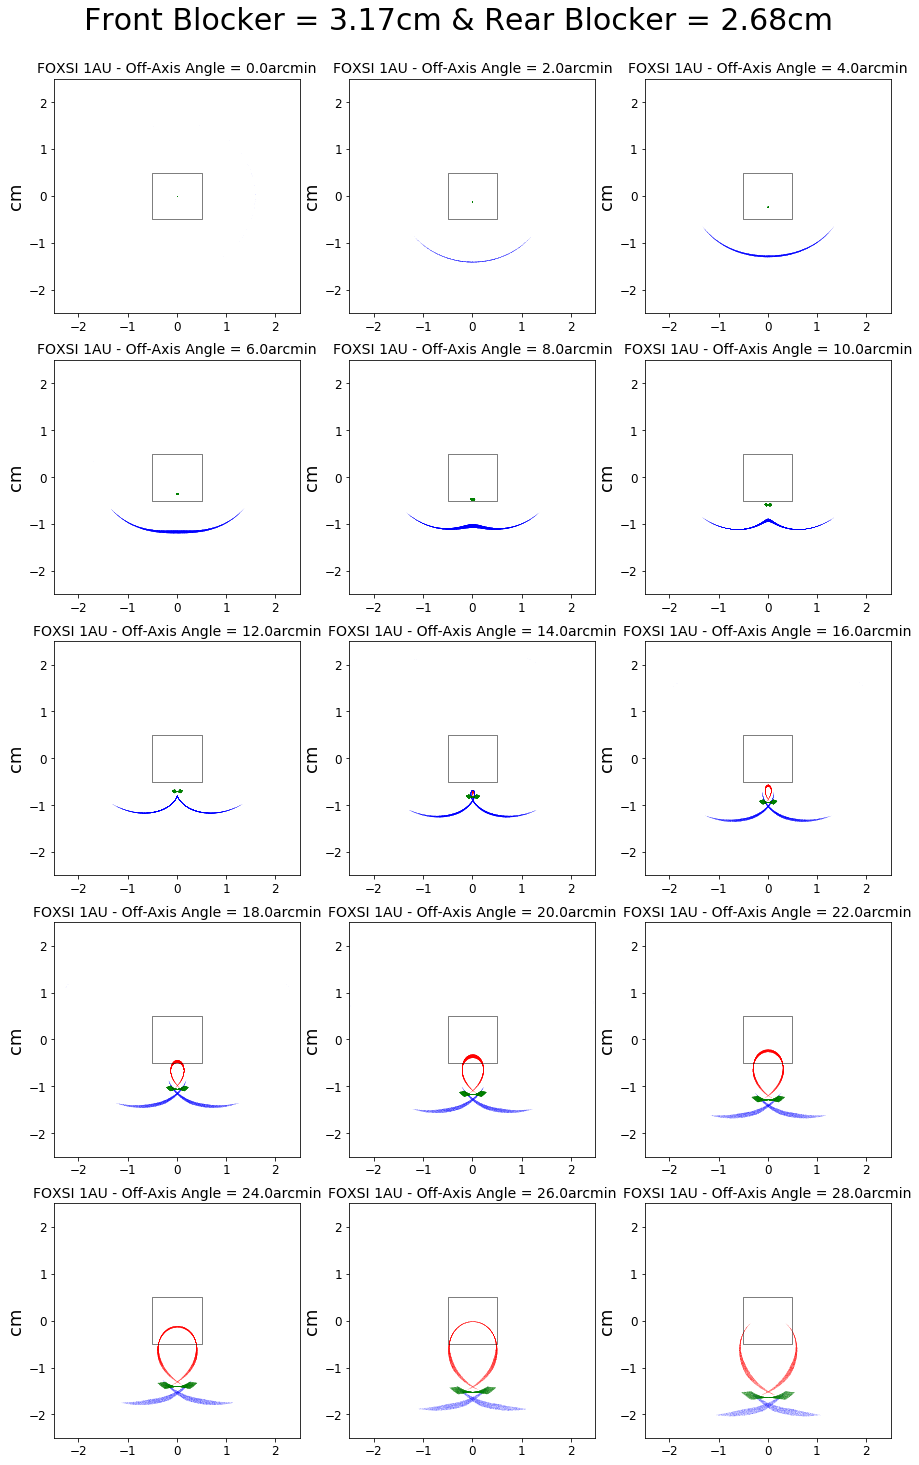

In [176]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & Rear Blocker = 2.68cm", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.5,-0.5),1.0,1.0,fill=False,linewidth=0.5))
plt.show()

In [177]:
Rout = 3.29
fbr = 3.17
Doubles, Hyp, Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - fbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - fbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - fbr**2))

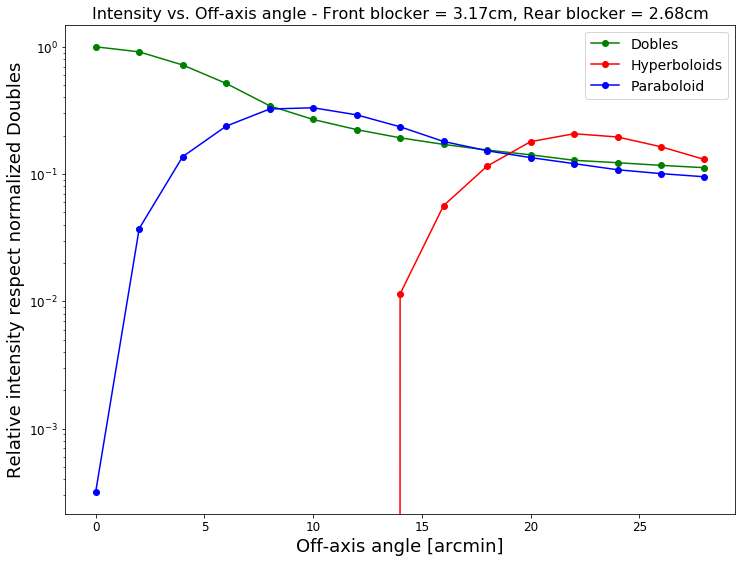

In [178]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, Rear blocker = 2.68cm',fontsize=16)
plt.semilogy(offaxisAngles, Doubles/max(np.array(Doubles)),'go-',label='Dobles')
plt.semilogy(offaxisAngles, Hyp/max(np.array(Doubles)),'ro-',label='Hyperboloids')
plt.semilogy(offaxisAngles, Par/max(np.array(Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

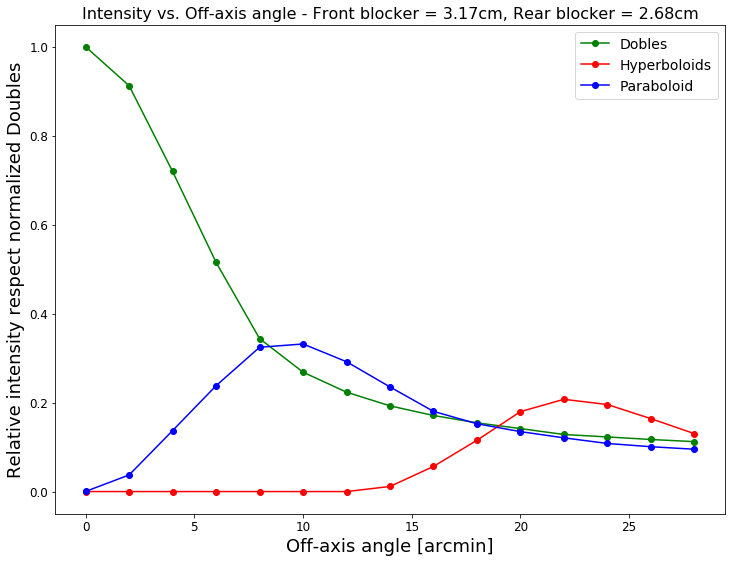

In [179]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, Rear blocker = 2.68cm',fontsize=16)
plt.plot(offaxisAngles, Doubles/max(np.array(Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles, Hyp/max(np.array(Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, Par/max(np.array(Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# QUESTION: Does the Rear blocker have an effect on the Ghost Rays?

## I ran the simulation with only the front blocker (3.17cm) and no rear blocker.

In [162]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


NR_All_Drays, NR_All_Hrays, NR_All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    NR_All_Drays.append(Drays)
    NR_All_Hrays.append(Hrays)
    NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

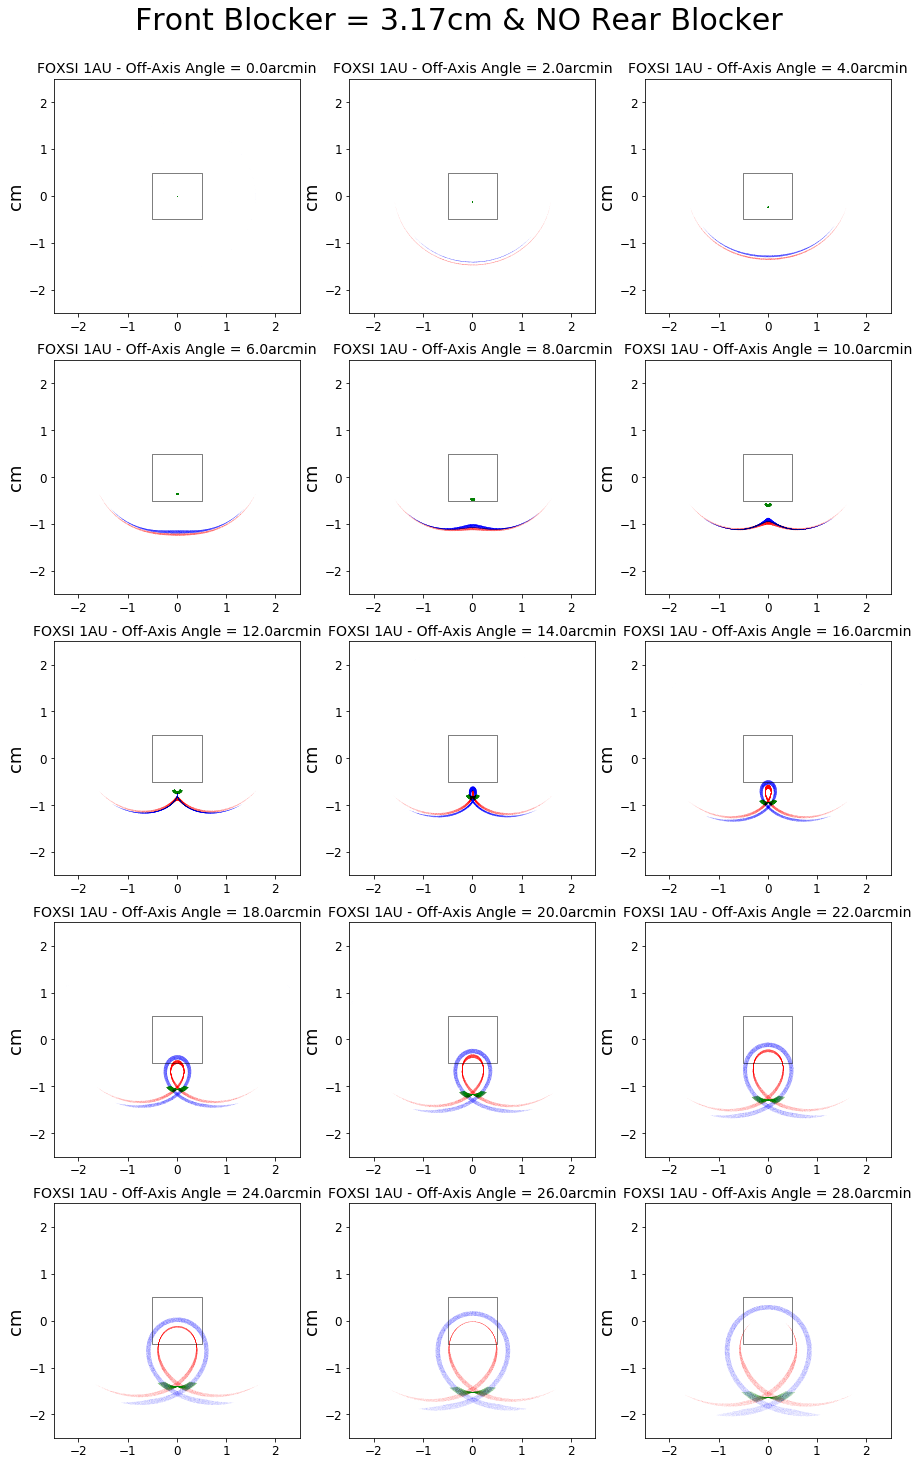

In [155]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.5,-0.5),1.0,1.0,fill=False,linewidth=0.5))    
plt.show()

In [166]:
Rout = 3.29
fbr = 3.17
NR_Doubles, NR_Hyp, NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    NR_Doubles.append(len(NR_All_Drays[i]) * (Rout**2 - fbr**2))
    NR_Hyp.append(len(NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    NR_Par.append(len(NR_All_Prays[i]) * (Rout**2 - fbr**2))

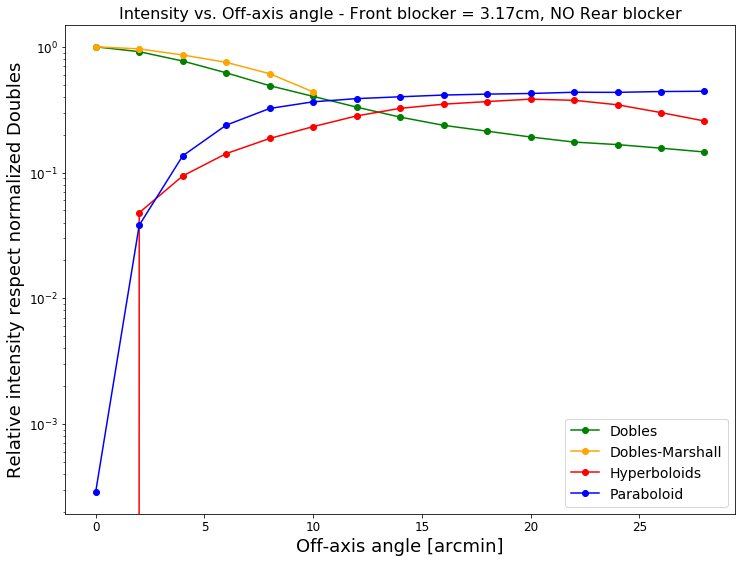

In [167]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, NO Rear blocker',fontsize=16)
plt.semilogy(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles[:6], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.semilogy(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids')
plt.semilogy(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

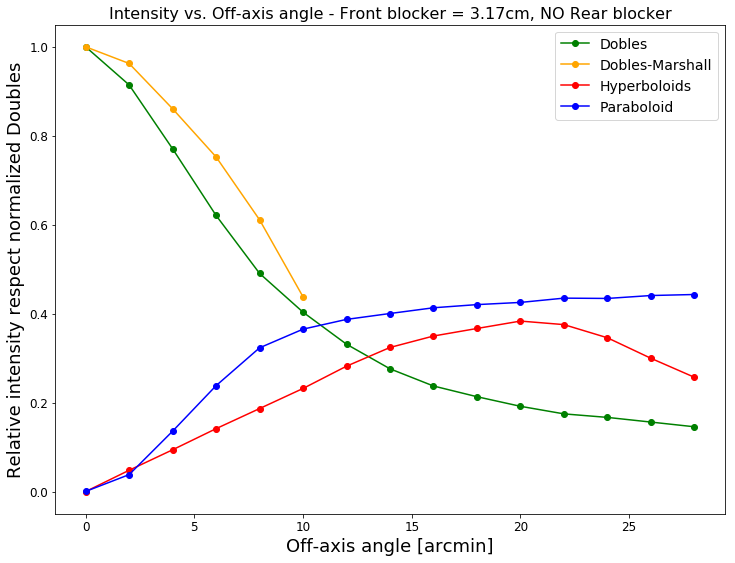

In [168]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles[:6], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# Plot with and without Rear Blocker together:

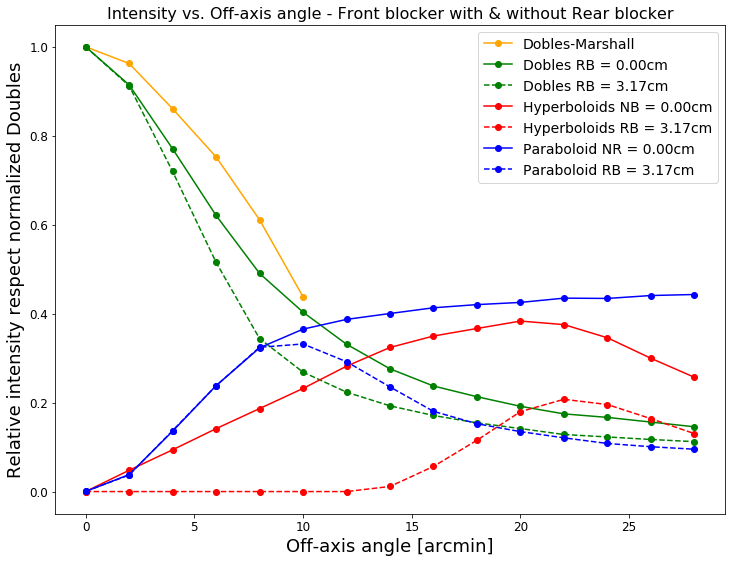

In [183]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker with & without Rear blocker',fontsize=16)
plt.plot(offaxisAngles[:6], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles RB = 0.00cm')
plt.plot(offaxisAngles, Doubles/max(np.array(Doubles)),'go--',label='Dobles RB = 3.17cm')
plt.plot(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids NB = 0.00cm')
plt.plot(offaxisAngles, Hyp/max(np.array(Doubles)),'ro--',label='Hyperboloids RB = 3.17cm')
plt.plot(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid NR = 0.00cm')
plt.plot(offaxisAngles, Par/max(np.array(Doubles)),'bo--',label='Paraboloid RB = 3.17cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

# How many of the rays fall in the 1cm x 1cm FOXSI detectors?

In [229]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 2.68
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles
Ron_Doubles = [2.411, 2.3206, 2.0751, 1.814, 1.4732, 1.0556, 0.0] # Front blocker size unknown

All_Drays, All_Hrays, All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    All_Drays.append(Drays)
    All_Hrays.append(Hrays)
    All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R268/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

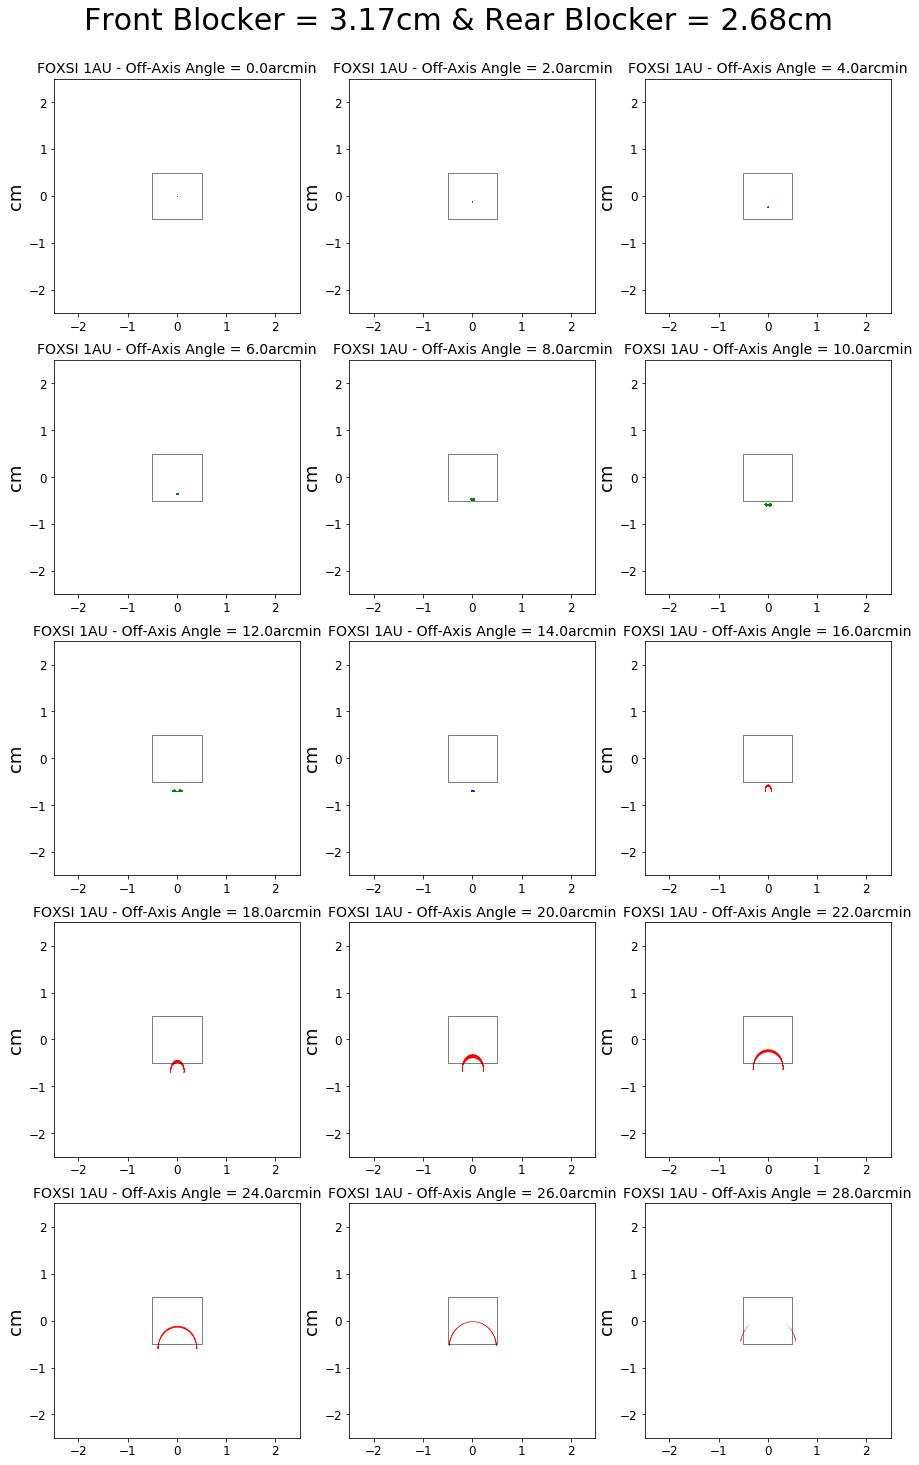

In [230]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & Rear Blocker = 2.68cm", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=18)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=0.0001,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=0.0001,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=0.0001,alpha=0.8)
    plt.ylim(-2.5,2.5)
    plt.xlim(-2.5,2.5)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.5,-0.5),1.0,1.0,fill=False,linewidth=0.5))
plt.show()

In [231]:
Rout = 3.29
fbr = 3.17
Doubles, Hyp, Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    Doubles.append(len(All_Drays[i]) * (Rout**2 - fbr**2))
    Hyp.append(len(All_Hrays[i]) * (Rout**2 - fbr**2))
    Par.append(len(All_Prays[i]) * (Rout**2 - fbr**2))

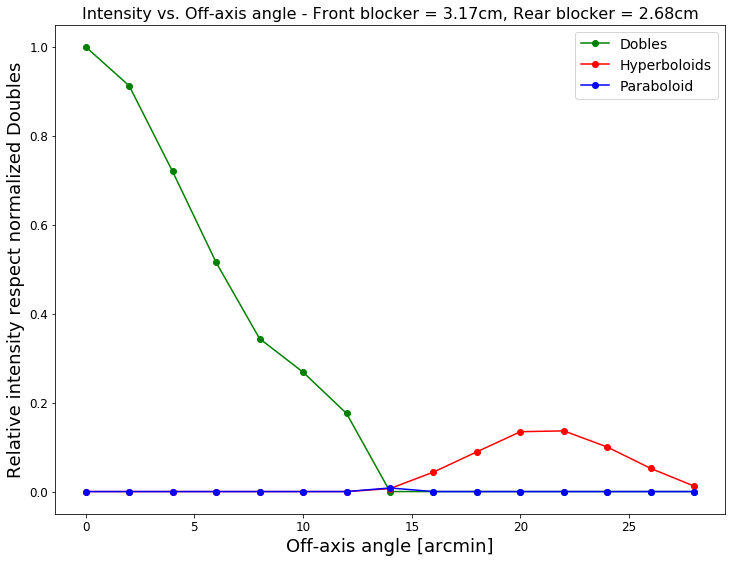

In [232]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, Rear blocker = 2.68cm',fontsize=16)
plt.plot(offaxisAngles, Doubles/max(np.array(Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles, Hyp/max(np.array(Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, Par/max(np.array(Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

In [233]:
from foxsisim.util import load_rays
from foxsisim.detector import Detector
import matplotlib.pyplot as plt 
import matplotlib.patches as patches
import numpy as np

fbr = 3.17
rbr = 0.00
offaxisAngles = np.arange(0.0,30.,2.) # Off-Axis Angles


NR_All_Drays, NR_All_Hrays, NR_All_Prays = [], [], []
All_Dx, All_Dy, All_Hx, All_Hy, All_Px, All_Py = [], [], [], [], [], []

for angle in offaxisAngles:
    # Loading Rays:
    Brays = load_rays('/Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_'+str(angle)+'.csv')
    # Fix little bug in rays:
    for ray in Brays:
        ray.hist = ray.hist.tolist()
    # Create detector :
    detector = Detector(width=10,
                    height=10,
                    normal = [0,0,1],
                    center = [0,0,230],
                    reso = [1024,1024])
    # Detector Catch rays:
    detector.catchRays(Brays)
    
    '''Defining D, H, and P rays for each blocker size: '''
    Drays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==2 )]
    Srays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 )]
    Hrays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 and ray.tag[-4:] == 'Hy-D' )]
    Prays = [ray for ray in Brays if (ray.des[2]==230.0 and (np.sqrt(ray.des[0]**2 + ray.des[1]**2)<=np.sqrt(0.5)) and ray.bounces ==1 and ray.tag[-4:] == 'Pa-D' )]

    NR_All_Drays.append(Drays)
    NR_All_Hrays.append(Hrays)
    NR_All_Prays.append(Prays)
    
    sim_scale = 1.0    # 1cm = 17.4 arcmin
    #sim_scale = 17.4    # 1cm = 17.4 arcmin

    #Hyperboloid
    Hx, Hy = [], []
    for ray in Hrays:
        Hx.append(ray.pos[0]*sim_scale)
        Hy.append(ray.pos[1]*sim_scale)
    All_Hx.append(Hx)
    All_Hy.append(Hy)
        
    # Paraboloid
    Px, Py = [], []
    for ray in Prays:
        Px.append(ray.pos[0]*sim_scale)
        Py.append(ray.pos[1]*sim_scale)
    All_Px.append(Px)
    All_Py.append(Py)
        
    # Double
    Dx, Dy = [], []
    for ray in Drays:
        Dx.append(ray.pos[0]*sim_scale)
        Dy.append(ray.pos[1]*sim_scale)
    All_Dx.append(Dx)
    All_Dy.append(Dy)
    

Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_0.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_2.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_4.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_6.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_8.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_10.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_12.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/Off-axis/F317R000/rays_Angle_=_14.0.csv loaded.
Rays from /Users/Kamilobu/Desktop/Developer/Milo_RayTracing/blockers/

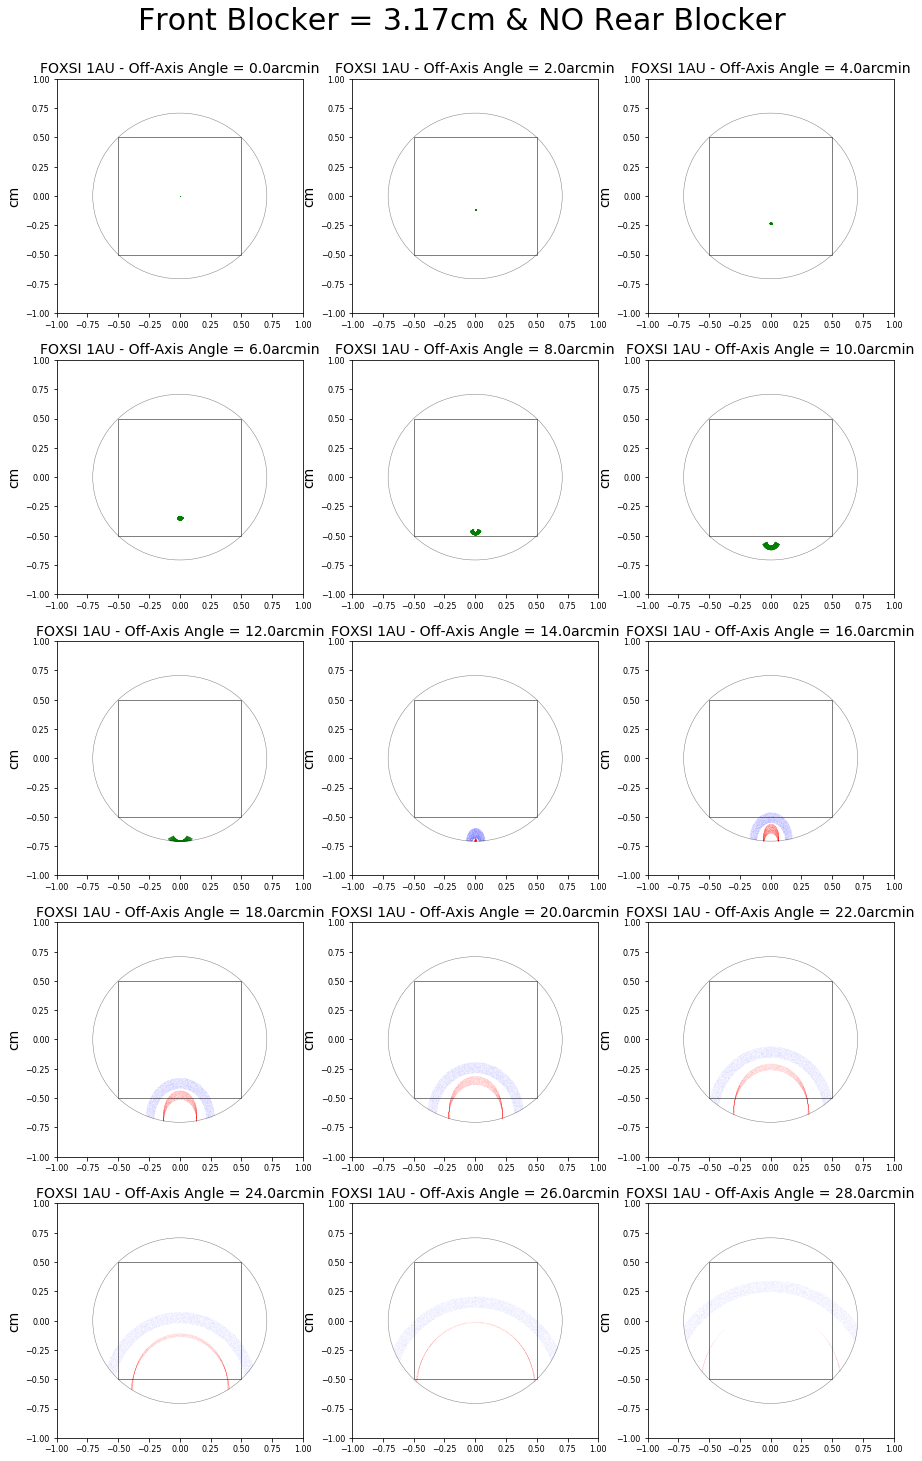

In [281]:
fig = plt.figure(figsize=(15,25))
st = fig.suptitle("Front Blocker = 3.17cm & NO Rear Blocker", fontsize=30,y=0.92)
for i, angle in enumerate(offaxisAngles):
    plt.subplot(5,3,i+1)
    plt.title('FOXSI 1AU - Off-Axis Angle = '+str(angle)+'arcmin',fontsize=14)
    plt.ylabel('cm',fontsize=14)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    plt.scatter(All_Hx[i],All_Hy[i],color='red',s=0.00001,alpha=0.8)
    plt.scatter(All_Px[i],All_Py[i],color='blue',s=0.00001,alpha=0.8)
    plt.scatter(All_Dx[i],All_Dy[i],color='green',s=0.00001,alpha=0.8)
    plt.ylim(-1.0,1.0)
    plt.xlim(-1.0,1.0)
    plt.tick_params(labelsize=8)
    ax = plt.gca()
    ax.add_patch(patches.Rectangle((-0.5,-0.5),1.0,1.0,fill=False,linewidth=0.5))
    ax.add_patch(patches.Circle((0,0),np.sqrt(0.5),fill=False,linewidth=0.5,alpha=0.5))
plt.show()

In [235]:
Rout = 3.29
fbr = 3.17
NR_Doubles, NR_Hyp, NR_Par = [], [], []
for i, angles in enumerate(offaxisAngles):
    NR_Doubles.append(len(NR_All_Drays[i]) * (Rout**2 - fbr**2))
    NR_Hyp.append(len(NR_All_Hrays[i]) * (Rout**2 - fbr**2))
    NR_Par.append(len(NR_All_Prays[i]) * (Rout**2 - fbr**2))

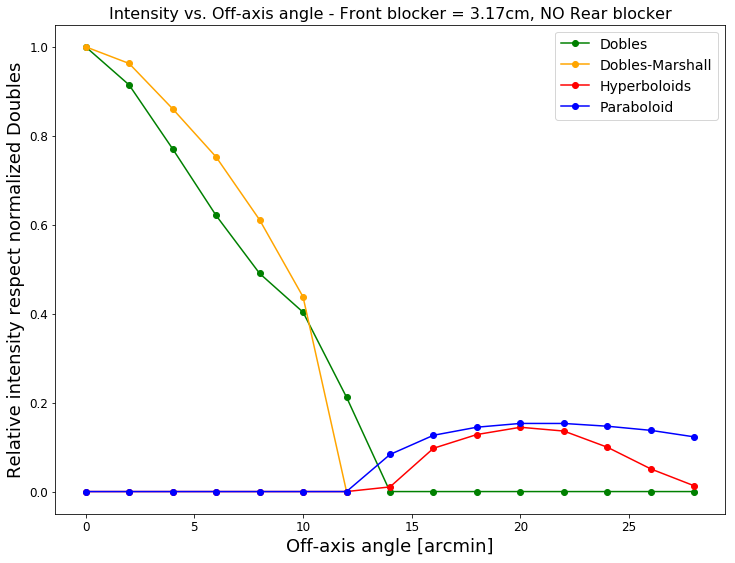

In [262]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm, NO Rear blocker',fontsize=16)
plt.plot(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles')
plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids')
plt.plot(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
#plt.axvline(3.17,color='purple',linestyle='--',lw=0.8)
#plt.text(3.155,5e-1,'Most efficient front blocker size = 3.17cm',rotation=90,fontsize=12,color='purple')
plt.legend(fontsize=14)
plt.show()

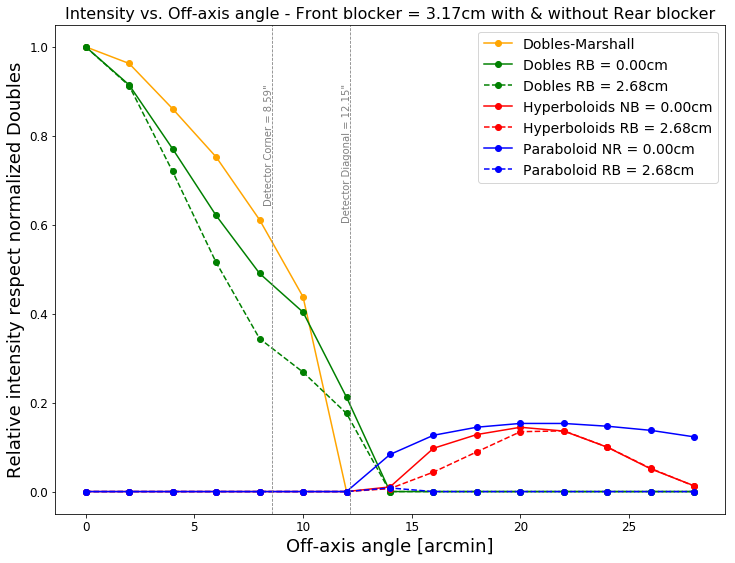

In [267]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm with & without Rear blocker',fontsize=16)
plt.plot(offaxisAngles[:7], Ron_Doubles/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.plot(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles RB = 0.00cm')
plt.plot(offaxisAngles, Doubles/max(np.array(Doubles)),'go--',label='Dobles RB = 2.68cm')
plt.plot(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids NB = 0.00cm')
plt.plot(offaxisAngles, Hyp/max(np.array(Doubles)),'ro--',label='Hyperboloids RB = 2.68cm')
plt.plot(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid NR = 0.00cm')
plt.plot(offaxisAngles, Par/max(np.array(Doubles)),'bo--',label='Paraboloid RB = 2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.59,color='Grey',linestyle='--',lw=0.8)
plt.text(8.2,0.9,'Detector Corner = 8.59"',rotation=90,fontsize=10,color='Grey')
plt.axvline(12.15,color='Grey',linestyle='--',lw=0.8)
plt.text(11.8,0.9,'Detector Diagonal = 12.15"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

## Plot in log Scale

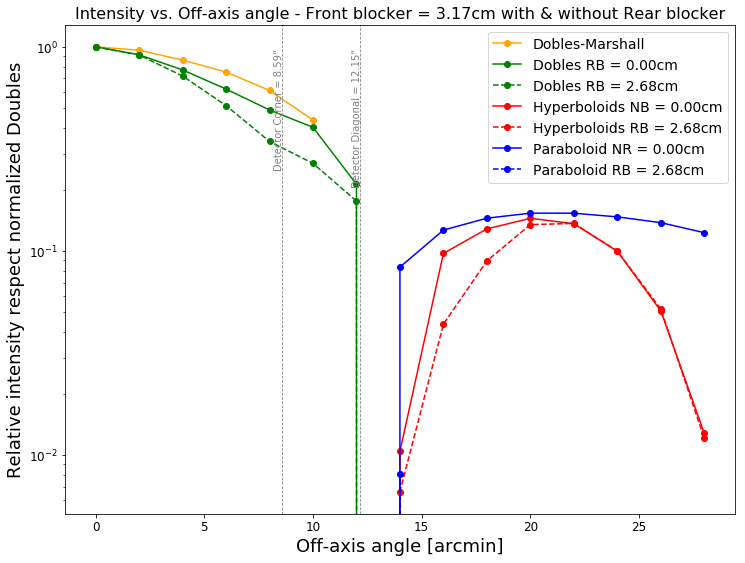

In [266]:
# Plotting :
fig = plt.figure(figsize=(12,9))
plt.title('Intensity vs. Off-axis angle - Front blocker = 3.17cm with & without Rear blocker',fontsize=16)
plt.semilogy(offaxisAngles[:6], Ron_Doubles[:6]/max(np.array(Ron_Doubles)),'o-',label='Dobles-Marshall',color='orange')
plt.semilogy(offaxisAngles, NR_Doubles/max(np.array(NR_Doubles)),'go-',label='Dobles RB = 0.00cm')
plt.semilogy(offaxisAngles, Doubles/max(np.array(Doubles)),'go--',label='Dobles RB = 2.68cm')
plt.semilogy(offaxisAngles, NR_Hyp/max(np.array(NR_Doubles)),'ro-',label='Hyperboloids NB = 0.00cm')
plt.semilogy(offaxisAngles, Hyp/max(np.array(Doubles)),'ro--',label='Hyperboloids RB = 2.68cm')
plt.semilogy(offaxisAngles, NR_Par/max(np.array(NR_Doubles)),'bo-',label='Paraboloid NR = 0.00cm')
plt.semilogy(offaxisAngles, Par/max(np.array(Doubles)),'bo--',label='Paraboloid RB = 2.68cm')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel('Relative intensity respect normalized Doubles',fontsize=18)
plt.xlabel('Off-axis angle [arcmin]',fontsize=18)
plt.axvline(8.59,color='Grey',linestyle='--',lw=0.8)
plt.text(8.2,0.9,'Detector Corner = 8.59"',rotation=90,fontsize=10,color='Grey')
plt.axvline(12.15,color='Grey',linestyle='--',lw=0.8)
plt.text(11.8,0.9,'Detector Diagonal = 12.15"',rotation=90,fontsize=10,color='Grey')
plt.legend(fontsize=14)
plt.show()

### Detector Diagonal

In [251]:
60*180*np.arcsin(np.sqrt(0.5)/200)/np.pi

12.15429558965976

### Detector Corner

In [252]:
60*180*np.arcsin(0.5/200)/np.pi

8.5943758794530769

# Let's validate my simulation by reproducing Ron's latest plot of the blockers:

<img src="../Slides/ron_sim.png",width=900,height=600>

### This is done in the next Notebook: 